In [1]:
import sys
import numpy as np
import logging
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataset as dataset
import snelib19odp.lc.observables as observables
import snelib19odp.dataset as dataset
import snelib19odp.mftools.ingest as ingest
import snelib19odp.utils as utils
import astropy.table as table

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
#logging.basicConfig(level=logging.DEBUG)
import seaborn
import astropy.time as time
import astropy.units as u

import corner, os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from tqdm import tqdm_notebook
from collections import OrderedDict
from mosfit.plotting import bandcolorf

sns.reset_orig()

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 14})

SN2019odp 9236.545272195022
SN2008D 9888.240274423675
iPTF13bvn 6240.626845550551
SN1998bw 29297.204152213162


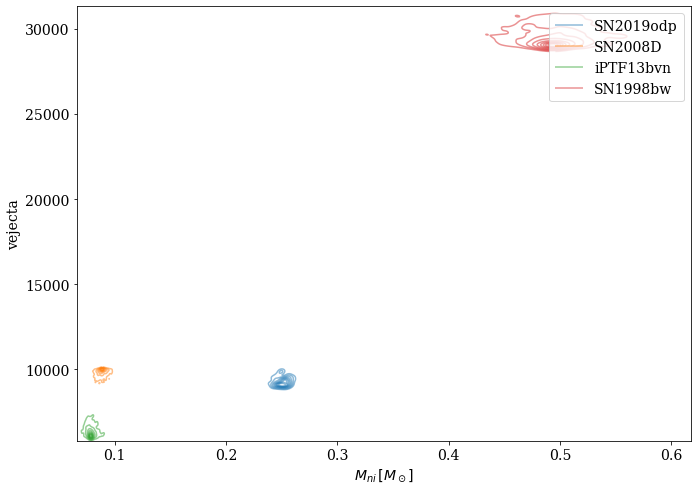

In [3]:
def plot(products_dir, name):
    params = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))
    sns.kdeplot(params['mejecta']*params['fnickel'], params['vejecta'], alpha=0.5, label=name)
    print(name, np.mean(params['vejecta']))

plt.figure(figsize=(11,8))
plot('../products/mosfit_runs/19odp_allbands_ib/1636487337', 'SN2019odp')
plot('../products/mosfit_runs/08d/1637341648', 'SN2008D')
plot('../products/mosfit_runs/13bvn/1637342695', 'iPTF13bvn')
plot('../products/mosfit_runs/98bw/1637749340', 'SN1998bw')

plt.xlabel(r'$M_{ni}\, [M_\odot]$')
plt.legend()
plt.savefig('../paper/plots/tmp_mosfit/comparison_mni_vej.png')

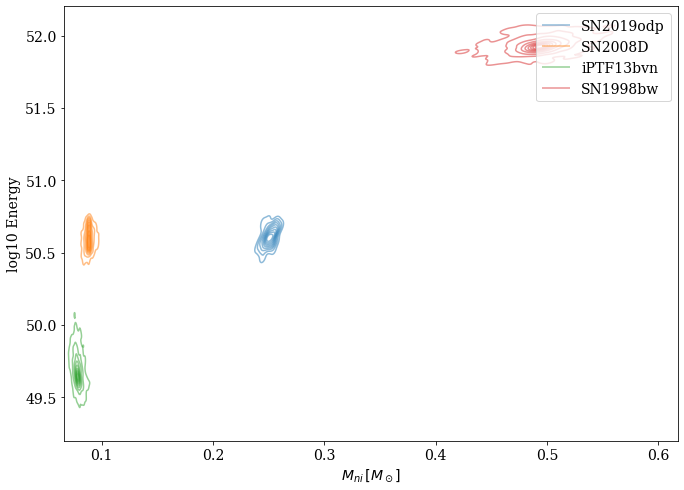

In [7]:
def plot(products_dir, name):
    params = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))
    energy = 3/10 * params['mejecta'] * u.solMass.to(u.g) * (params['vejecta'] * u.km.to(u.cm))**2
    sns.kdeplot(params['mejecta']*params['fnickel'], np.log10(energy), alpha=0.5, label=name)

plt.figure(figsize=(11,8))
plot('../products/mosfit_runs/19odp_allbands_ib/1636487337', 'SN2019odp')
plot('../products/mosfit_runs/08d/1637341648', 'SN2008D')
plot('../products/mosfit_runs/13bvn/1637342695', 'iPTF13bvn')
plot('../products/mosfit_runs/98bw/1637749340', 'SN1998bw')

plt.xlabel(r'$M_{ni}\, [M_\odot]$')
plt.ylabel('log10 Energy')
plt.legend()
plt.savefig('../paper/plots/tmp_mosfit/comparison_mni_energy.png')

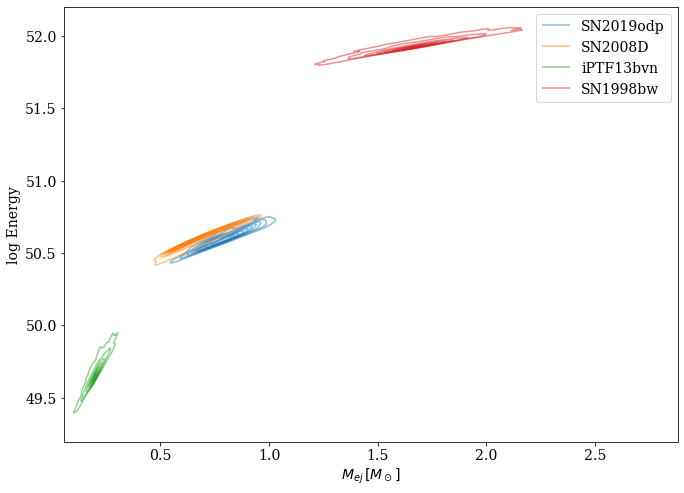

In [8]:
def plot(products_dir, name):
    params = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))
    energy = 3/10 * params['mejecta'] * u.solMass.to(u.g) * (params['vejecta'] * u.km.to(u.cm))**2
    sns.kdeplot(params['mejecta'], np.log10(energy), alpha=0.5, label=name)

plt.figure(figsize=(11,8))
plot('../products/mosfit_runs/19odp_allbands_ib/1636487337', 'SN2019odp')
plot('../products/mosfit_runs/08d/1637341648', 'SN2008D')
plot('../products/mosfit_runs/13bvn/1637342695', 'iPTF13bvn')
plot('../products/mosfit_runs/98bw/1637749340', 'SN1998bw')

plt.xlabel(r'$M_{ej}\, [M_\odot]$')
plt.ylabel('log Energy')
plt.legend()
plt.savefig('../paper/plots/tmp_mosfit/comparison_mej_energy.png')

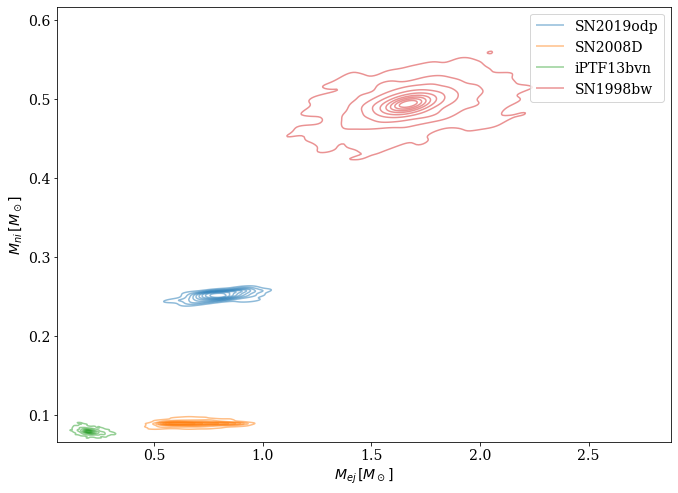

In [9]:
def plot(products_dir, name):
    params = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))
    energy = 3/10 * params['mejecta'] * u.solMass.to(u.g) * (params['vejecta'] * u.km.to(u.cm))**2
    sns.kdeplot(params['mejecta'], params['mejecta']*params['fnickel'], alpha=0.5, label=name)

plt.figure(figsize=(11,8))
plot('../products/mosfit_runs/19odp_allbands_ib/1636487337', 'SN2019odp')
plot('../products/mosfit_runs/08d/1637341648', 'SN2008D')
plot('../products/mosfit_runs/13bvn/1637342695', 'iPTF13bvn')
plot('../products/mosfit_runs/98bw/1637749340', 'SN1998bw')

plt.xlabel(r'$M_{ej}\, [M_\odot]$')
plt.ylabel(r'$M_{ni}\, [M_\odot]$')
plt.legend()
plt.savefig('../paper/plots/tmp_mosfit/comparison_mej_mni.png')

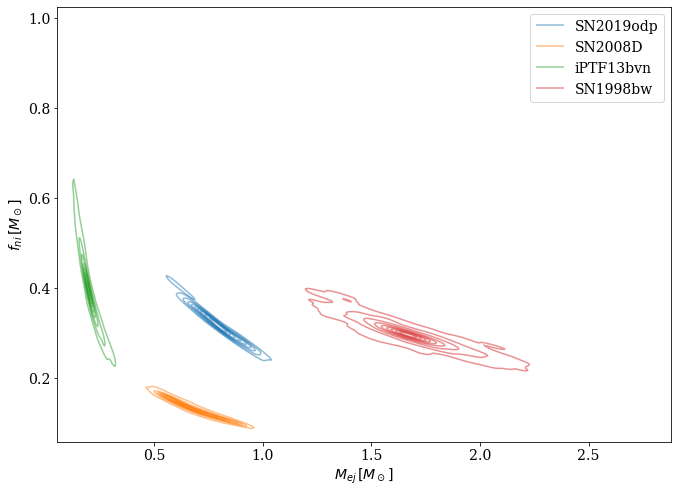

In [11]:
def plot(products_dir, name):
    params = ingest.load_params(os.path.join(products_dir, 'mosfit/products/walkers.json'))
    energy = 3/10 * params['mejecta'] * u.solMass.to(u.g) * (params['vejecta'] * u.km.to(u.cm))**2
    sns.kdeplot(params['mejecta'], params['fnickel'], alpha=0.5, label=name)

plt.figure(figsize=(11,8))
plot('../products/mosfit_runs/19odp_allbands_ib/1636487337', 'SN2019odp')
plot('../products/mosfit_runs/08d/1637341648', 'SN2008D')
plot('../products/mosfit_runs/13bvn/1637342695', 'iPTF13bvn')
plot('../products/mosfit_runs/98bw/1637749340', 'SN1998bw')

plt.xlabel(r'$M_{ej}\, [M_\odot]$')
plt.ylabel(r'$f_{ni}\, [M_\odot]$')
plt.legend()